<a href="https://colab.research.google.com/github/Szalacha1/FinalYearProject/blob/main/Forecasting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd 
from tensorflow import keras
import keras as k
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
import plotly.offline as py
import plotly.graph_objs as go
import keras_tuner as kt
import tensorflow as tf
from IPython.display import SVG
import os
import datetime, time
import random
from keras import backend as K
from keras.regularizers import L1L2
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('gold_price_data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv("gold_price_data.csv")
df.head()

,Date,Value
0,1970-01-01,35.2
1,1970-04-01,35.1
2,1970-07-01,35.4
3,1970-10-01,36.2
4,1971-01-01,37.4


Epoch 1/7
431/431 [==============================] - 68s 154ms/step - loss: 0.0140 - val_loss: 0.1094
Epoch 2/7
431/431 [==============================] - 64s 149ms/step - loss: 0.0014 - val_loss: 0.0640
Epoch 3/7
431/431 [==============================] - 64s 149ms/step - loss: 8.6289e-04 - val_loss: 0.0352
Epoch 4/7
431/431 [==============================] - 65s 151ms/step - loss: 4.1144e-04 - val_loss: 0.0129
Epoch 5/7
431/431 [==============================] - 64s 148ms/step - loss: 1.8276e-04 - val_loss: 0.0019
Epoch 6/7
431/431 [==============================] - 64s 149ms/step - loss: 6.2698e-05 - val_loss: 1.4568e-04
Epoch 7/7
68/68 [==============================] - 4s 49ms/step
MSE: 847.236616206396
RMSE: 29.10732925237896


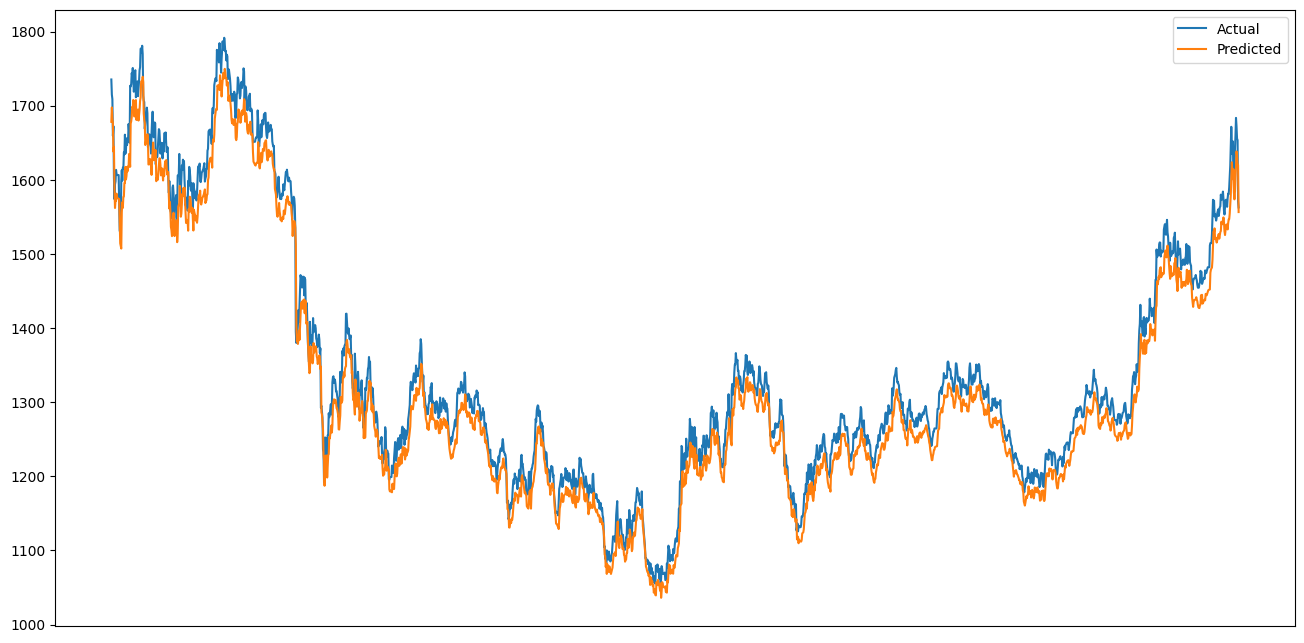

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

# Load the data
df = pd.read_csv("gold_price_data.csv")

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train = df[0:train_size]
test = df[train_size:len(df)]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train['Value'].values.reshape(-1, 1))

# Create sequences
lookback = 25

def create_sequences(data, lookback):
    X = []
    y = []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        y.append(data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    return X, y

X_train, y_train = create_sequences(train_scaled, lookback)

# Build the model
model = Sequential()
model.add(LSTM(units=480, input_shape=(X_train.shape[1], 1), activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=3.4577102780507904e-06), loss=MeanSquaredError())

# Fit the model
history = model.fit(X_train, y_train, epochs=7, batch_size=16, validation_split=0.2)

# Prepare the test data
inputs = df['Value'].values[len(df) - len(test) - lookback:]
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test, y_test = create_sequences(inputs, lookback)

# Get predictions
predictions = model.predict(X_test)

# Inverse scaling
predictions = scaler.inverse_transform(predictions)

# Print MSE and RMSE
mse = mean_squared_error(test['Value'].values, predictions)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

# Plot the predictions
plt.figure(figsize=(16,8))
plt.plot(test['Value'].values)
plt.plot(predictions)
plt.legend(['Actual', 'Predicted'])
plt.xticks([]) 
plt.show()
